In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [37]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
df.shape

(768, 9)

In [38]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['Outcome'],axis = 1),
    df['Outcome'],
    test_size = 0.3,
    random_state = 0
)

In [40]:
constant_features = [
    features for features in x_train.columns if x_train[features].std()==9
]
len(constant_features)

0

###  **Constant Features**

In [59]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create a DataFrame with 100 rows and 5 random features
data = {
    'feature_1': np.random.normal(0, 1, 100),
    'feature_2': np.random.normal(5, 2, 100),
    'feature_3': np.random.randint(0, 10, 100),
    
    # Constant features
    'feature_4': 0,             # All zeros
    'feature_5': 3.1415         # All the same value
}

df = pd.DataFrame(data)

# Add a target column (for ML use)
df['target'] = np.random.choice([0, 1], size=100)

# Save to CSV (optional)
# df.to_csv("raw_dataset_with_constant_features.csv", index=False)

print(df.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  target
0   0.496714   2.169259          1          0     3.1415       1
1  -0.138264   4.158709          9          0     3.1415       1
2   0.647689   4.314571          0          0     3.1415       1
3   1.523030   3.395445          7          0     3.1415       0
4  -0.234153   4.677429          0          0     3.1415       1


In [60]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

### **Quasi Constant Features**

In [69]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)


0

# **Raw Data**

## Dataset 1

In [67]:
import pandas as pd

# Load SECOM data and labels
data = pd.read_csv('/kaggle/input/secom-data/secom_data.csv', sep='\s+', header=None)
labels = pd.read_csv('/kaggle/input/secom-data/secom_labels.csv', sep='\s+', header=None)

# Keep only the label column (ignore timestamp)
labels = labels[[0]]
labels.columns = ['target']

# Combine features and target
df = pd.concat([data, labels], axis=1)

# Optional: Save combined dataset
df.to_csv('/content/secom_combined.csv', index=False)

# Preview
print(df.shape)
df.head()


(1567, 591)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,target
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'],axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0
)

### **Duplicate Features**

In [51]:
duplicate_feats = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col_2 = x_train.columns[j]
        if x_train[col_1].equals(x_train[col_2]):
            duplicate_feats.append(col_2)

print("Duplicate features:", duplicate_feats)
duplicate_features = set(duplicate_feats)
print(len(duplicate_features))
x_train.drop(labels = duplicate_features,axis = 1,inplace=True)
x_test.drop(labels = duplicate_features,axis = 1,inplace=True)



Duplicate features: [149, 284, 422, 179, 186, 189, 315, 322, 325, 451, 458, 461, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 498, 501, 502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 276, 414, 284, 422, 313, 314, 449, 450, 186, 189, 315, 322, 325, 451, 458, 461, 189, 315, 322, 325, 451, 458, 461, 315, 322, 325, 451, 458, 461, 191, 192, 193, 194, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 192, 193, 194, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 193, 194, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 194, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 498, 501, 502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 364, 369, 370, 371,

In [52]:
duplicate_feats = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col_2 = x_train.columns[j]
        if x_train[col_1].equals(x_train[col_2]):
            duplicate_feats.append(col_2)

print("Duplicate features:", duplicate_feats)
duplicate_features = set(duplicate_feats)
print(len(duplicate_features))

Duplicate features: []
0


### Quasi Constant

In [69]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)
print(len(quasi_constant_features))
x_train.drop(labels = quasi_constant_features,axis = 1,inplace=True)
x_test.drop(labels = quasi_constant_features,axis = 1,inplace=True)


16


In [70]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)
len(quasi_constant_features)

0

### Constant Features

In [33]:
constant_features = [
    features for features in x_train.columns if x_train[features].std()==0
]
len(constant_features)

116

In [37]:
x_train.drop(labels = constant_features,axis = 1,inplace=True)
x_test.drop(labels = constant_features,axis = 1,inplace=True)
constant_features = [
    features for features in x_train.columns if x_train[features].std()==0
]
len(constant_features)

0

NaN values

In [20]:
print(df.isna().sum().sort_values(ascending=False).head())


var3                       0
imp_trasp_var17_in_ult1    0
ind_var7_emit_ult1         0
imp_venta_var44_ult1       0
imp_venta_var44_hace3      0
dtype: int64


Removing NaN with threshold 90%

In [62]:
threshold = 0.9
df = df.loc[:, df.isna().mean() < threshold]
print(f"Remaining columns: {df.shape[1]}")

Remaining columns: 587


Filling rest of NaN values

In [63]:
# Fill remaining NaNs with column median
df = df.fillna(df.median(numeric_only=True))


In [64]:
print(df.isna().sum().sort_values(ascending=False).head())


0      0
407    0
391    0
392    0
393    0
dtype: int64


### **Correlation**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0
)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

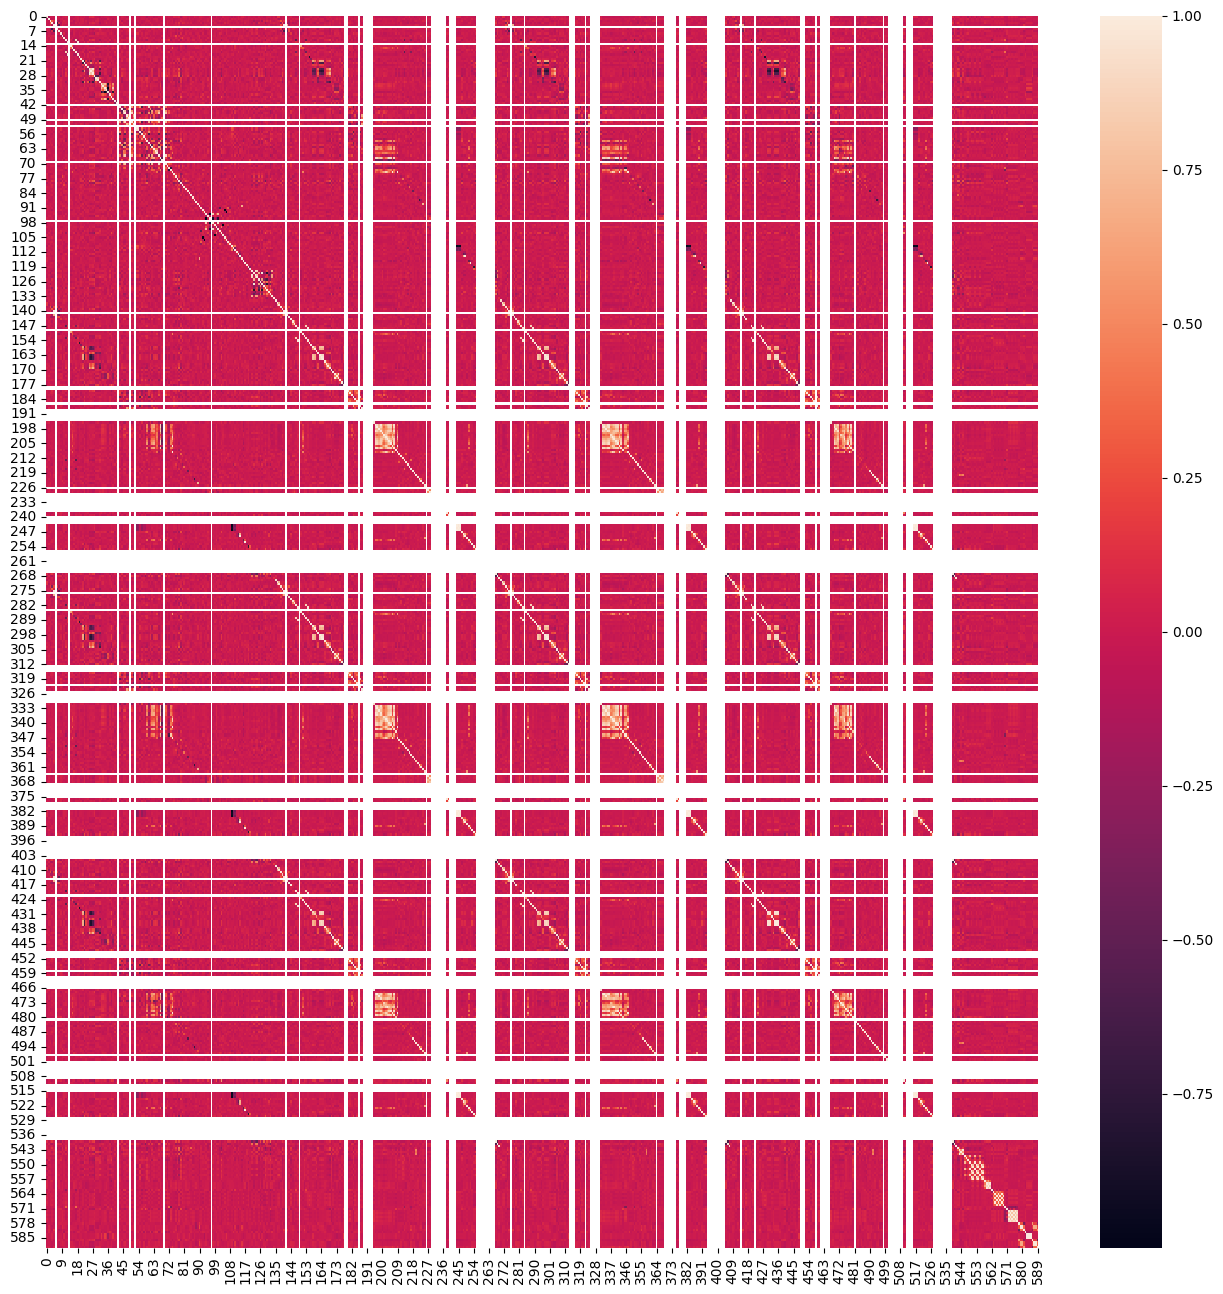

In [13]:
corr_mat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [15]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(x_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated features


209


In [16]:
x_train.drop(labels=correlated_features,axis = 1,inplace = True)
x_test.drop(labels=correlated_features,axis = 1,inplace = True)

In [17]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(x_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated features


0


### **Mutual Information**

41     0.036904
125    0.025625
369    0.024257
130    0.023514
126    0.023115
         ...   
109    0.000000
370    0.000000
108    0.000000
102    0.000000
0      0.000000
Length: 377, dtype: float64


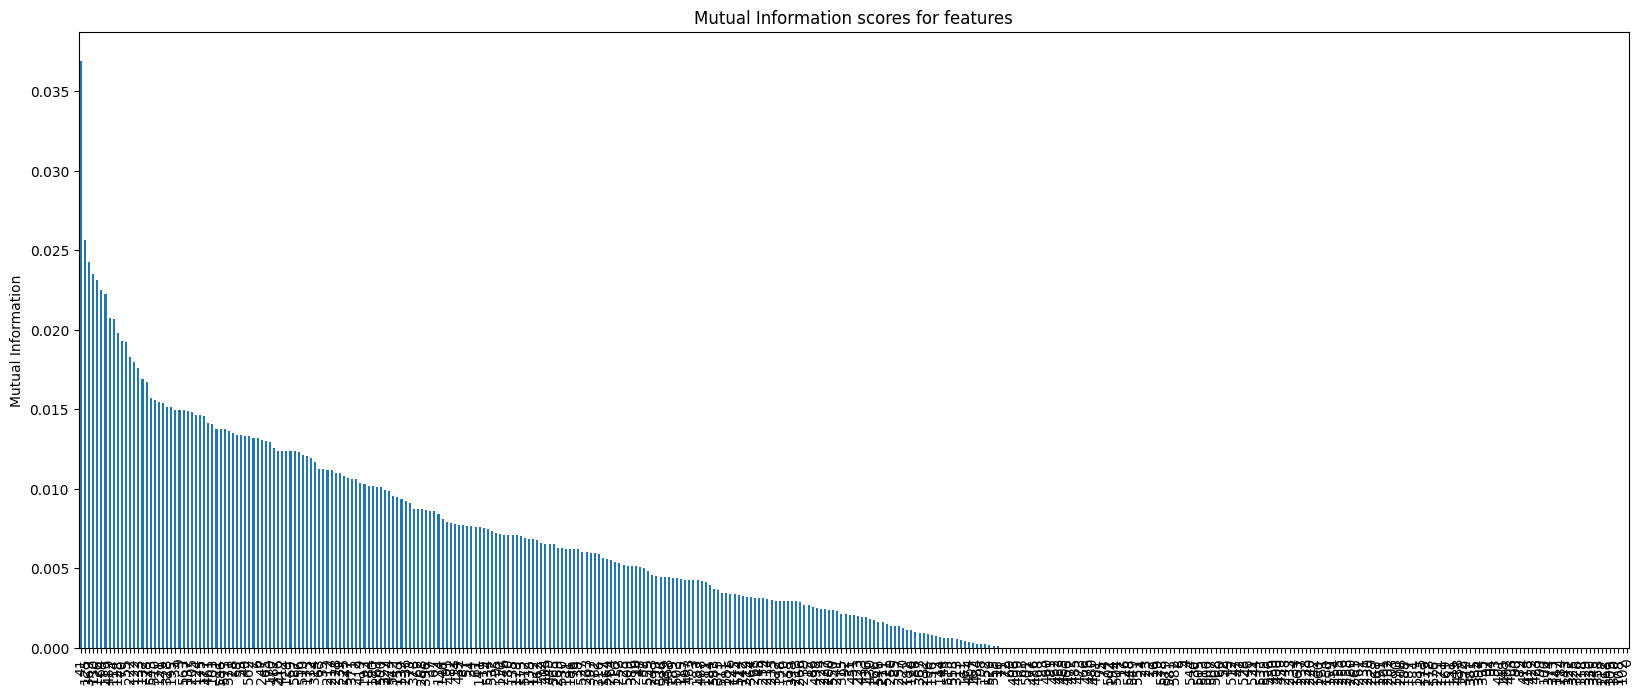

In [21]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# fill missing values before MI computation
mi = mutual_info_classif(x_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=x_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()


In [25]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=10)
sel_.fit(x_train.fillna(0), y_train)

# Get the names of selected features
selected_features = x_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)


Top 10 features selected by mutual information:
Index([41, 55, 64, 119, 122, 125, 126, 130, 372, 562], dtype='object')


In [31]:
# transform X_train and X_test to keep only selected features
X_train_selected = sel_.transform(x_train.fillna(0))
X_test_selected = sel_.transform(x_test.fillna(0))

# if you want a DataFrame with the feature names preserved:
selected_feature_names = x_train.columns[sel_.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=x_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=x_test.index)

print("Transformed X_train shape:", X_train_selected_df.shape)
print("Transformed X_test shape:", X_test_selected_df.shape)


Transformed X_train shape: (1096, 10)
Transformed X_test shape: (471, 10)


## Madelon

In [74]:
import pandas as pd
import numpy as np

# Load training features
X_train = pd.read_csv('/kaggle/input/madelon-direct/madelon_train.data', sep='\s+', header=None)

# Load training labels
y_train = pd.read_csv('/kaggle/input/madelon-direct/madelon_train.labels', sep='\s+', header=None)
y_train = y_train[0]  # convert to Series

# Optionally: load validation and test data
X_valid = pd.read_csv('/kaggle/input/madelon-direct/madelon_valid.data', sep='\s+', header=None)
X_test = pd.read_csv('/kaggle/input/madelon-direct/madelon_test.data', sep='\s+', header=None)

# Confirm shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)


X_train: (2000, 500)
y_train: (2000,)
X_valid: (600, 500)
X_test: (1800, 500)


# **WEEK - 3**

In [3]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_train.csv')
test_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_test.csv')

# Print basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Separate features and target from train data
X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

# Drop 'ID' from both datasets before model training
X_train = X_train.drop(columns=['ID'])
X_test = test_df.drop(columns=['ID'])

# Combine X and y into a single DataFrame for feature selection
df = pd.concat([X_train, y_train], axis=1)

# Verify shape and structure
print("Combined dataframe shape:", df.shape)
print("Columns:", df.columns[-5:])  # Show last few columns (should include 'TARGET')

# Rename TARGET column if needed
df.rename(columns={'TARGET': 'target'}, inplace=True)

# Preview
print("\n✅ Cleaned datasets ready:")
print(f"Features (X_train): {X_train.shape}")
print(f"Target (y_train): {y_train.shape}")
print(f"Test features (X_test): {X_test.shape}")

# Sample preview
print("\nX_train sample:")
print(X_train.head())
print("\nTarget distribution:")
print(y_train.value_counts())


Train shape: (76020, 371)
Test shape: (75818, 370)
Combined dataframe shape: (76020, 370)
Columns: Index(['saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object')

✅ Cleaned datasets ready:
Features (X_train): (76020, 369)
Target (y_train): (76020,)
Test features (X_test): (75818, 369)

X_train sample:
   var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0     2     23                 0.0                      0.0   
1     2     34                 0.0                      0.0   
2     2     23                 0.0                      0.0   
3     2     37                 0.0                    195.0   
4     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2     

In [9]:
#Constant 
constantFeatures = [f for f in X_train.columns if X_train[f].std() == 0]
print(len(constantFeatures))
X_train.drop(labels = constantFeatures, axis  = 1, inplace = True)
X_test.drop(labels = constantFeatures, axis  = 1, inplace = True)

34


In [11]:
constantFeatures = [f for f in X_train.columns if X_train[f].std() == 0]
print(len(constantFeatures))

0


In [13]:
#Quasi Constant
qConsFeats = []
for f in X_train.columns:
    predominant =  (X_train[f].value_counts()/np.float64(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        qConsFeats.append(f)
print(len(qConsFeats))

112


In [ ]:
X_train.drop(labels = qConsFeats, axis  = 1, inplace = True)
X_test.drop(labels = qConsFeats, axis  = 1, inplace = True)

In [16]:
qConsFeats = []
for f in X_train.columns:
    predominant =  (X_train[f].value_counts()/np.float64(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        qConsFeats.append(f)
print(len(qConsFeats))

0


In [17]:
#Duplicate Features
dFeats = []
for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for i in range(i+1,len(X_train.columns)):
        col2 = X_train.columns[i]
        if X_train[col1].equals(X_train[col2]):
            dFeats.append(col2)
print(len(dFeats))

10


In [18]:
X_train.drop(labels = dFeats, axis  = 1, inplace = True)
X_test.drop(labels = dFeats, axis  = 1, inplace = True)

In [19]:
#Duplicate Features
dFeats = []
for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for i in range(i+1,len(X_train.columns)):
        col2 = X_train.columns[i]
        if X_train[col1].equals(X_train[col2]):
            dFeats.append(col2)
print(len(dFeats))

0


<Axes: >

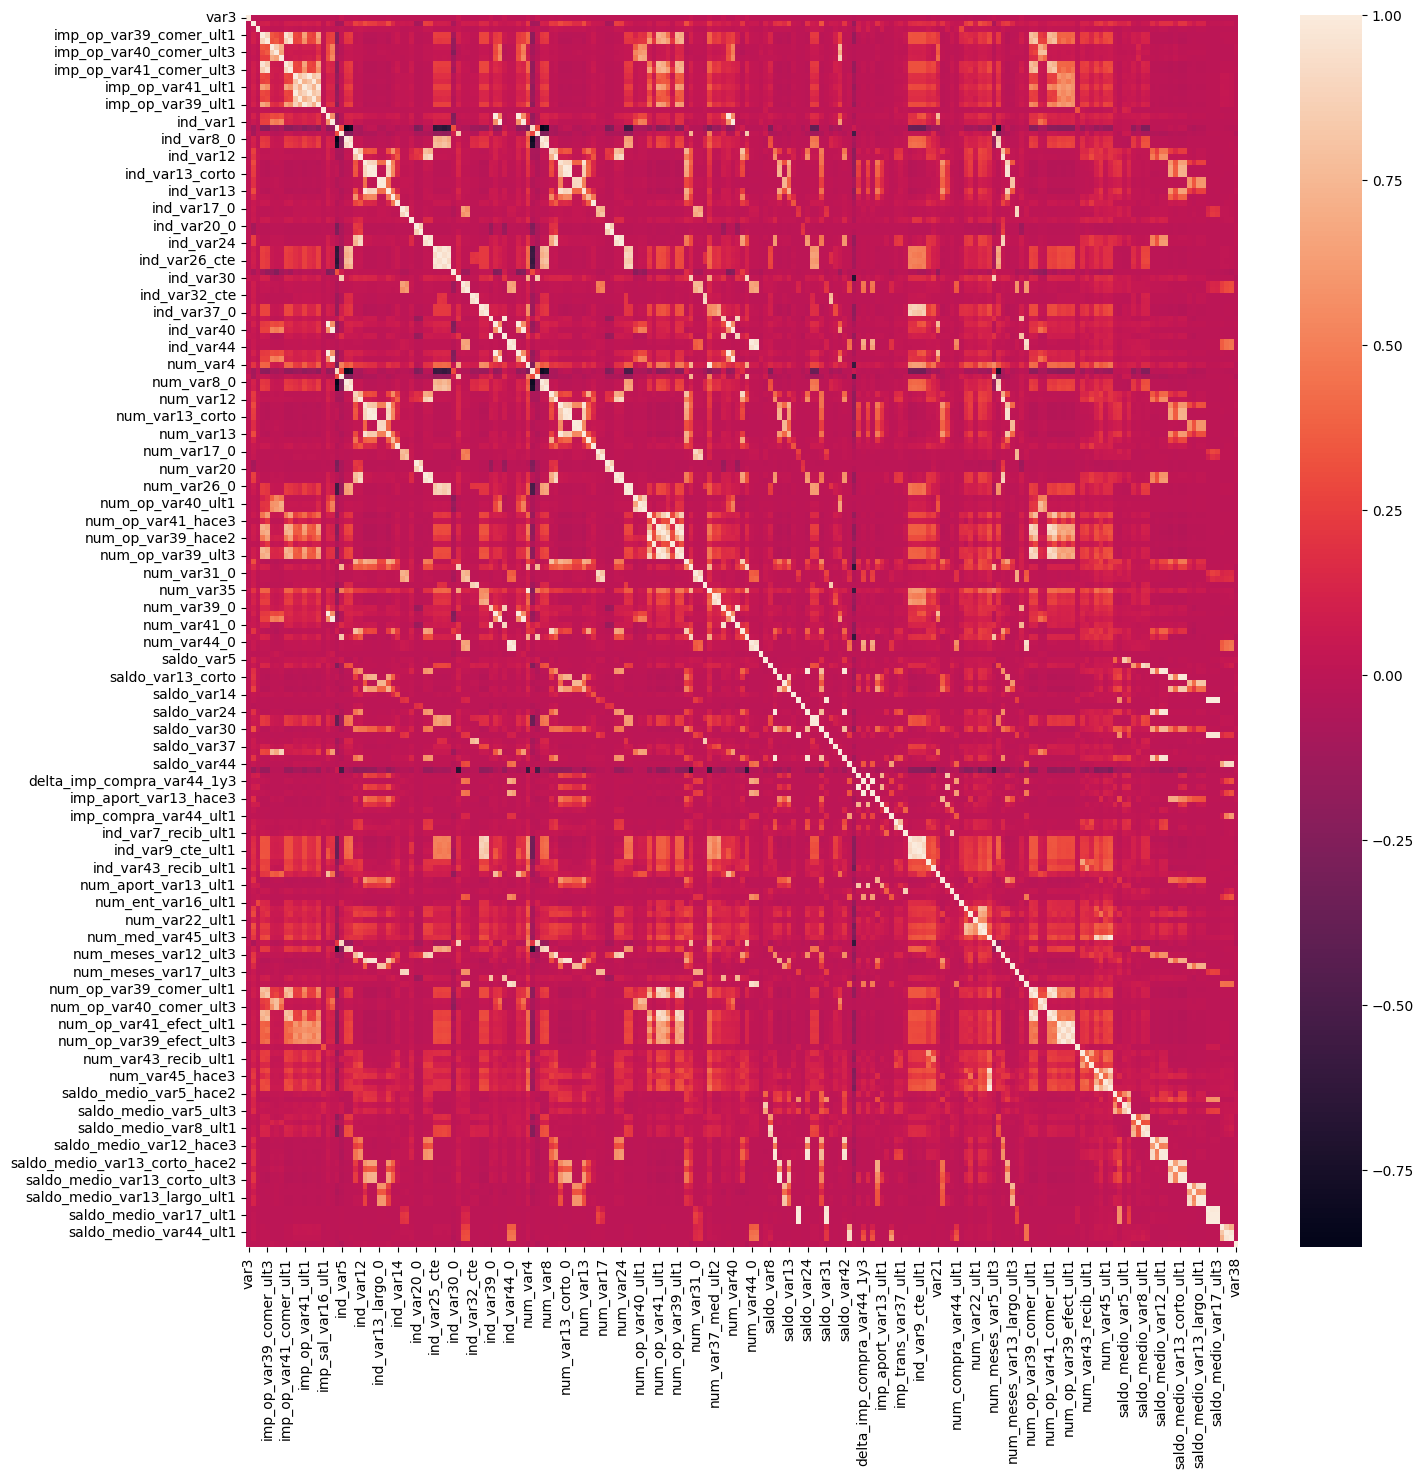

In [22]:
corr_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [23]:
#Correlation

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(X_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated feature

95


In [24]:
X_train.drop(labels = correlated_features, axis  = 1, inplace = True)
X_test.drop(labels = correlated_features, axis  = 1, inplace = True)

In [25]:
#Correlation

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(X_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated feature

0


In [27]:
#Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

ind_var30                     0.024289
num_var42                     0.023424
ind_var5                      0.022668
ind_var5_0                    0.017630
num_var4                      0.017092
                                ...   
delta_imp_aport_var13_1y3     0.000000
delta_imp_compra_var44_1y3    0.000000
imp_aport_var13_ult1          0.000000
var21                         0.000000
saldo_var13_largo             0.000000
Length: 118, dtype: float64


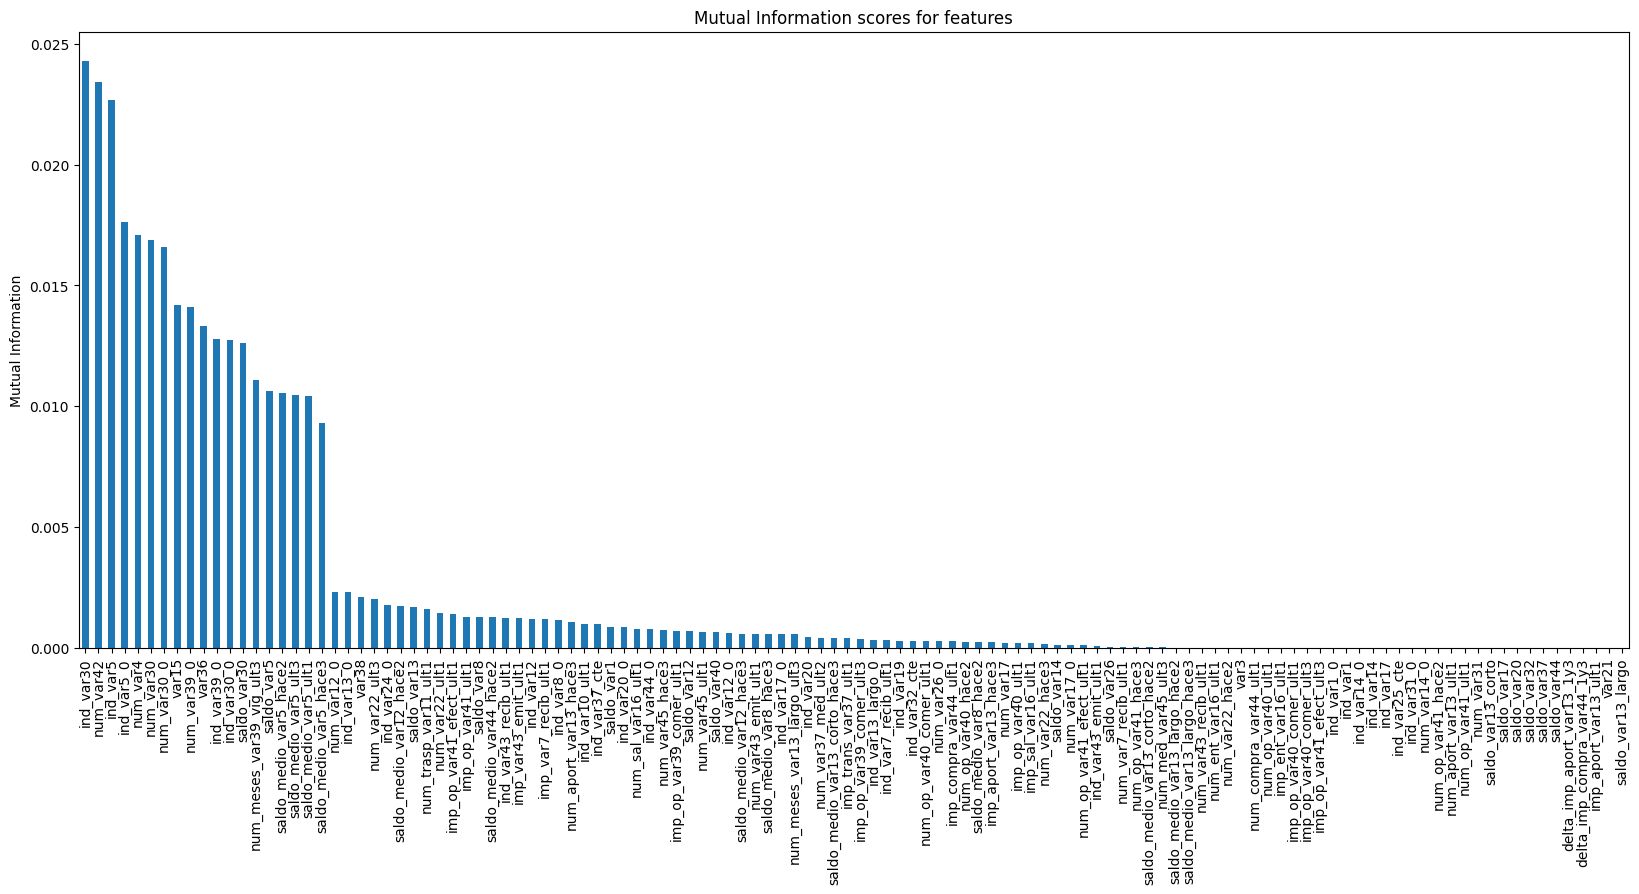

In [29]:
# fill missing values before MI computation
mi = mutual_info_classif(X_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=X_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()

In [31]:
# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=10)
sel_.fit(X_train.fillna(0), y_train)

# Get the names of selected features
selected_features = X_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)

Top 10 features selected by mutual information:
Index(['ind_var5_0', 'ind_var5', 'ind_var30', 'ind_var39_0', 'num_var4',
       'num_var30_0', 'num_var30', 'num_var39_0', 'num_var42',
       'num_meses_var39_vig_ult3'],
      dtype='object')


In [32]:


# transform X_train and X_test to keep only selected features
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

# if you want a DataFrame with the feature names preserved:
selected_feature_names = X_train.columns[sel_.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=X_test.index)

print("Transformed X_train shape:", X_train_selected_df.shape)
print("Transformed X_test shape:", X_test_selected_df.shape)


Transformed X_train shape: (76020, 10)
Transformed X_test shape: (75818, 10)


In [34]:
#Chi-Square
from sklearn.feature_selection import chi2

In [39]:
#Replace negative values with 0
X_train[X_train < 0] = 0
X_test[X_test < 0] = 0

In [40]:
f_score = chi2(X_train.fillna(0),y_train)
print(f"f-score {f_score}")

f-score (array([2.77160742e+02, 3.94456041e+03, 7.00952953e-01, 1.29645286e+04,
       2.34736681e+03, 1.80358305e+03, 3.55502232e+01, 2.08059669e+03,
       2.74014105e+05, 2.79777286e+05, 2.05200227e+05, 7.80041268e+02,
       1.94266392e-01, 6.93740654e+00, 3.45140236e+00, 4.68257507e+02,
       1.60110889e+02, 1.03522051e+02, 8.51454160e+01, 1.12246032e+02,
       2.78179703e+01, 2.98262308e+01, 4.12276694e+00, 2.24771432e+00,
       1.32392859e+00, 4.79261091e+00, 1.13708431e+01, 8.44573495e+00,
       6.68363110e+01, 4.03549039e+01, 3.18585345e-02, 4.55821225e+02,
       6.35543900e+00, 5.28784493e-01, 4.34954966e-01, 1.11333752e+01,
       2.46267077e+00, 3.74690054e+02, 1.87674678e+02, 5.07798435e+00,
       4.00978018e+00, 1.27046756e+00, 1.10775769e+02, 2.72146776e+01,
       8.98355048e+00, 1.47768411e+02, 1.70664509e+00, 3.98248133e+02,
       4.62976884e+01, 1.64648978e+03, 9.78959049e+00, 6.73393372e-04,
       3.08266420e+01, 1.41555639e+03, 9.07290819e+04, 1.42020648e+0

In [41]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)


saldo_var13_corto            0.000000
delta_imp_aport_var13_1y3    0.000000
var36                        0.000000
saldo_var44                  0.000000
saldo_var40                  0.000000
                               ...   
ind_var1_0                   0.659389
ind_var7_recib_ult1          0.750251
num_var7_recib_ult1          0.857113
ind_var30_0                  0.858338
num_var37_med_ult2           0.979297
Length: 118, dtype: float64

In [42]:
significant_features = pvalues[pvalues < 0.05].index.tolist()

X_train_selected_df = X_train[significant_features]
X_test_selected_df = X_test[significant_features]

print(f"Selected {len(significant_features)} features with p < 0.05")


Selected 102 features with p < 0.05


In [43]:
#Annova
from sklearn.feature_selection import f_classif

In [44]:
f_score, p_value = f_classif(X_train, y_train)
print("F-scores:", f_score)
print("p-values:", p_value)

F-scores: [8.42490094e+00 7.88508493e+02 2.31748826e-05 8.14903704e+00
 9.40258770e-01 7.39706043e-01 9.73564713e-03 7.24562366e-01
 6.61158055e+01 3.51094176e+01 5.78947362e+01 1.97275000e-02
 1.96513337e-01 6.96405951e+00 8.23104956e+01 1.41857747e+03
 1.65903276e+02 1.11177629e+02 8.93030701e+01 1.18615826e+02
 2.81133936e+01 3.05602369e+01 4.14485613e+00 2.25177983e+00
 1.32583531e+00 4.81298481e+00 1.14136900e+01 8.46929247e+00
 6.98557891e+01 4.14718444e+01 7.06136164e+00 1.74525566e+03
 6.38309439e+00 5.29414966e-01 4.68841962e-01 9.34779530e+01
 2.46732716e+00 4.92037964e+02 5.00571605e+01 9.89361272e-01
 3.62500427e-01 1.35280594e-01 2.50668800e+01 6.83800339e-01
 1.53408612e-01 4.41338348e+00 1.08542594e-01 9.60795729e+00
 8.74752422e+01 1.48210084e+03 1.42988926e+00 6.51615075e-05
 6.47857002e+01 1.42594075e+03 3.67445477e-02 1.50549181e+01
 1.05828895e+00 3.64150991e+01 5.08022786e+01 1.61860352e+01
 6.64258754e+01 1.46701898e+00 4.55880883e-02 3.82961872e-01
 1.98370244e+0

In [49]:
import pandas as pd

p_values_series = pd.Series(p_value, index=X_train.columns)
f_scores_series = pd.Series(f_score, index=X_train.columns)

# Sort by p-value (ascending = more significant)
sorted_p = p_values_series.sort_values()
print(sorted_p)

ind_var30                   0.000000e+00
num_var30                  3.833949e-321
num_var42                  3.612448e-309
ind_var5                   1.344170e-307
var36                      4.637014e-178
                               ...      
imp_sal_var16_ult1          8.883012e-01
imp_op_var40_comer_ult3     9.214010e-01
num_var7_recib_ult1         9.363405e-01
num_var37_med_ult2          9.935594e-01
imp_ent_var16_ult1          9.961590e-01
Length: 118, dtype: float64


In [57]:
selected_features = sorted_p[sorted_p < 0.05].index.tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [58]:
print(f"Number of selected features: {len(selected_features)}")
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")


Number of selected features: 70
X_train_selected shape: (76020, 70)
X_test_selected shape: (75818, 70)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'],axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0
)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

roc_values = []

for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    
    # Reshape the feature into 2D with .to_frame()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    
    # Predict probabilities
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    
    # Compute ROC AUC for the positive class
    auc = roc_auc_score(y_test, y_scored[:, 1])
    roc_values.append(auc)

# Convert to Series with feature names as index
roc_values = pd.Series(roc_values, index=X_train.columns)

# Sort by AUC value
roc_values_sorted = roc_values.sort_values(ascending=False)

# Print number of features better than random
print(f"Number of features with ROC AUC > 0.5: {len(roc_values[roc_values > 0.5])}")


Number of features with ROC AUC > 0.5: 260


In [ ]:
print("Hello")